In [70]:
!pip3 install requests pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [71]:
import requests
import pandas as pd
import time

In [72]:
API_KEY = 'b747376d2d2f4b9eb19f85a4593bed4a'
BASE_URL = 'https://api.rawg.io/api/games'

In [73]:
params = {
    'key': API_KEY,
    'page': 1,
    'page_size': 20
}

response = requests.get(BASE_URL, params=params)

if response.status_code == 200:
    data = response.json()
  
else:
    print(f"Error: {response.status_code}")

In [74]:
def fetch_games(page=1, page_size=20):
    """Fetch game data from RAWG API."""
    params = {
        'key': API_KEY,
        'page': page,
        'page_size': page_size
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json().get('results', [])
    else:
        print(f"Error: {response.status_code}")
        return []

all_games = []
for page in range(1, 6):  
    print(f"Fetching page {page}...")
    games = fetch_games(page)
    all_games.extend(games)

df = pd.DataFrame(all_games)

df.to_csv('rawg_games.csv', index=False)
print(f"Saved {len(df)} games to rawg_games.csv")

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Saved 100 games to rawg_games.csv


In [75]:
df = pd.read_csv('rawg_games.csv')
print(df.head())

print(df.columns)

     id                             slug                              name  \
0  3498               grand-theft-auto-v                Grand Theft Auto V   
1  3328          the-witcher-3-wild-hunt          The Witcher 3: Wild Hunt   
2  4200                         portal-2                          Portal 2   
3  4291  counter-strike-global-offensive  Counter-Strike: Global Offensive   
4  5286                      tomb-raider                Tomb Raider (2013)   

     released    tba                                   background_image  \
0  2013-09-17  False  https://media.rawg.io/media/games/20a/20aa03a1...   
1  2015-05-18  False  https://media.rawg.io/media/games/618/618c2031...   
2  2011-04-18  False  https://media.rawg.io/media/games/2ba/2bac0e87...   
3  2012-08-21  False  https://media.rawg.io/media/games/736/73619bd3...   
4  2013-03-05  False  https://media.rawg.io/media/games/021/021c4e21...   

   rating  rating_top                                            ratings  \
0   

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

Top 10 Trending Games:
                           name  rating  ratings_count
0            Grand Theft Auto V    4.47           7023
1      The Witcher 3: Wild Hunt    4.65           6799
2                      Portal 2    4.59           5832
8         Red Dead Redemption 2    4.59           5164
17            God of War (2018)    4.56           4884
5                        Portal    4.50           4810
7   The Elder Scrolls V: Skyrim    4.43           4718
9             BioShock Infinite    4.38           4076
4            Tomb Raider (2013)    4.06           3966
11                  Half-Life 2    4.49           3920


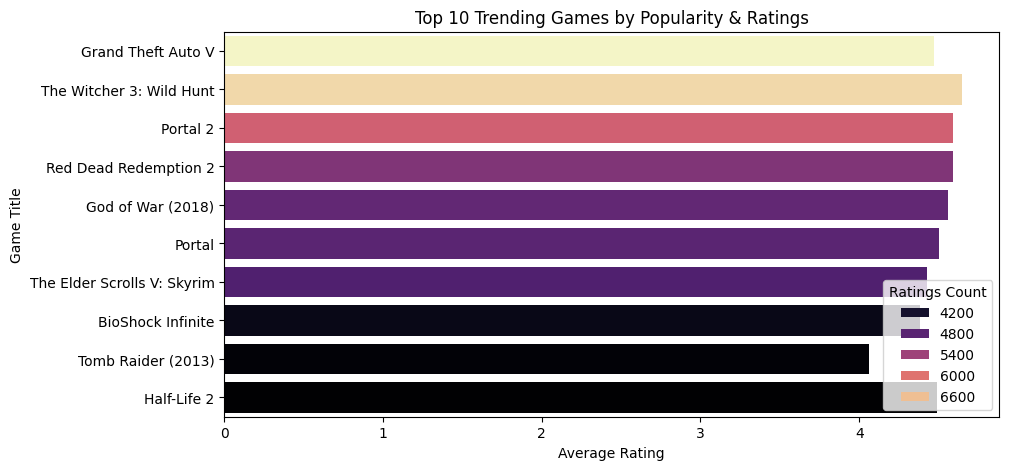

In [77]:
top_trending = df.sort_values(by=['ratings_count', 'rating'], ascending=[False, False]).head(10)


print("Top 10 Trending Games:")
print(top_trending[['name', 'rating', 'ratings_count']])


plt.figure(figsize=(10,5))
sns.barplot(data=top_trending, x='rating', y='name', hue='ratings_count', palette='magma')
plt.title('Top 10 Trending Games by Popularity & Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Game Title')
plt.legend(title='Ratings Count')
plt.show()


In [82]:
games_manual = pd.DataFrame({
    'name': [
        'Elden Ring: Shadow of the Erdtree', 'Starfield', 
        'Final Fantasy XVI', 'Hogwarts Legacy', 
        'Baldur\'s Gate 3', 'Spider-Man 2', 
        'The Legend of Zelda: Tears of the Kingdom', 
        'Call of Duty: Modern Warfare III', 
        'Resident Evil 4 Remake', 'Diablo IV'
    ],
    'genre': [
        'RPG', 'Action', 'RPG', 'Adventure', 
        'RPG', 'Action', 'Adventure', 
        'Shooter', 'Horror', 'RPG'
    ],
    'platform': [
        'PlayStation 5', 'Xbox Series X|S', 'PlayStation 5', 
        'PlayStation 5', 'PC', 'PlayStation 5', 
        'Nintendo Switch', 'PC', 'PC', 'PC'
    ],
    'rating': [9.5, 8.9, 9.1, 8.7, 9.6, 9.2, 9.7, 8.5, 9.0, 9.4],
    'sales_millions': [15.2, 12.5, 10.8, 14.0, 11.7, 13.6, 17.4, 10.5, 9.2, 11.3]
})

# Display dataset
print(" Top 10 Games of 2024")
print(games_manual)


 Top 10 Games of 2024
                                        name      genre         platform  \
0          Elden Ring: Shadow of the Erdtree        RPG    PlayStation 5   
1                                  Starfield     Action  Xbox Series X|S   
2                          Final Fantasy XVI        RPG    PlayStation 5   
3                            Hogwarts Legacy  Adventure    PlayStation 5   
4                            Baldur's Gate 3        RPG               PC   
5                               Spider-Man 2     Action    PlayStation 5   
6  The Legend of Zelda: Tears of the Kingdom  Adventure  Nintendo Switch   
7           Call of Duty: Modern Warfare III    Shooter               PC   
8                     Resident Evil 4 Remake     Horror               PC   
9                                  Diablo IV        RPG               PC   

   rating  sales_millions  
0     9.5            15.2  
1     8.9            12.5  
2     9.1            10.8  
3     8.7            14.0  
4

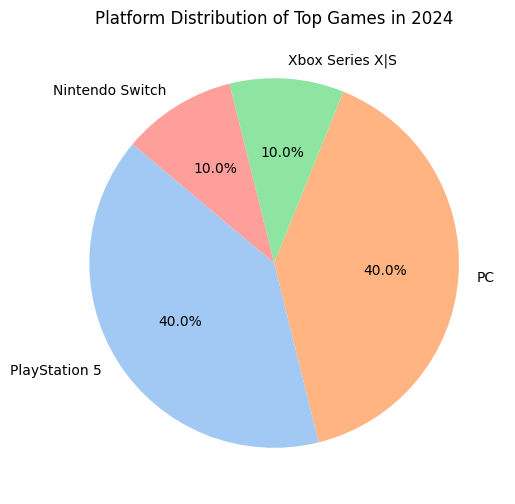

In [85]:
platform_counts = games_manual['platform'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    platform_counts, 
    labels=platform_counts.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title('Platform Distribution of Top Games in 2024')
plt.show()